<a href="https://colab.research.google.com/github/NestisN/DSE-3-P1/blob/main/Clean_Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libary**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
from wordcloud import WordCloud
import missingno as msno
np.set_printoptions(threshold=np.inf)

### **Load Data**



In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/My Drive/DSE3/DataAnalyst.csv', index_col=0)

Mounted at /content/drive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [4]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

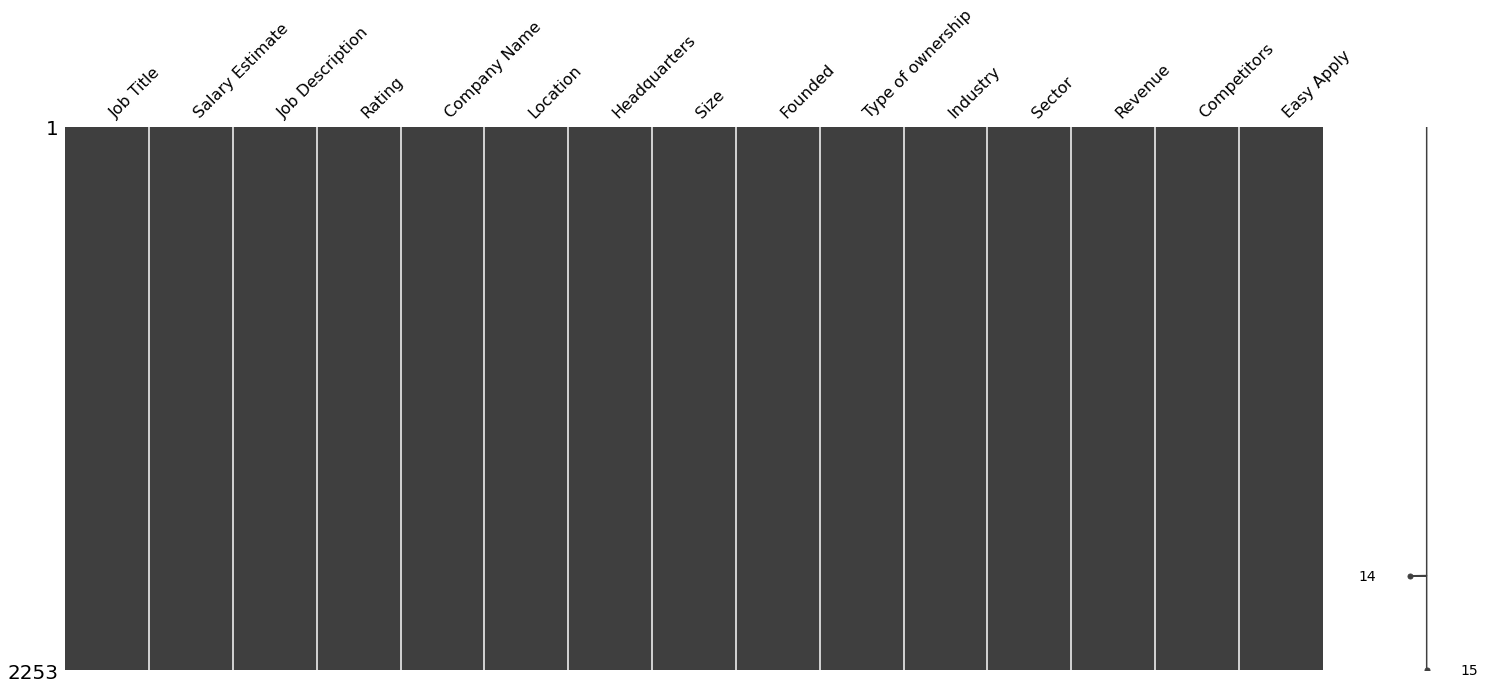

In [5]:
msno.matrix(data)

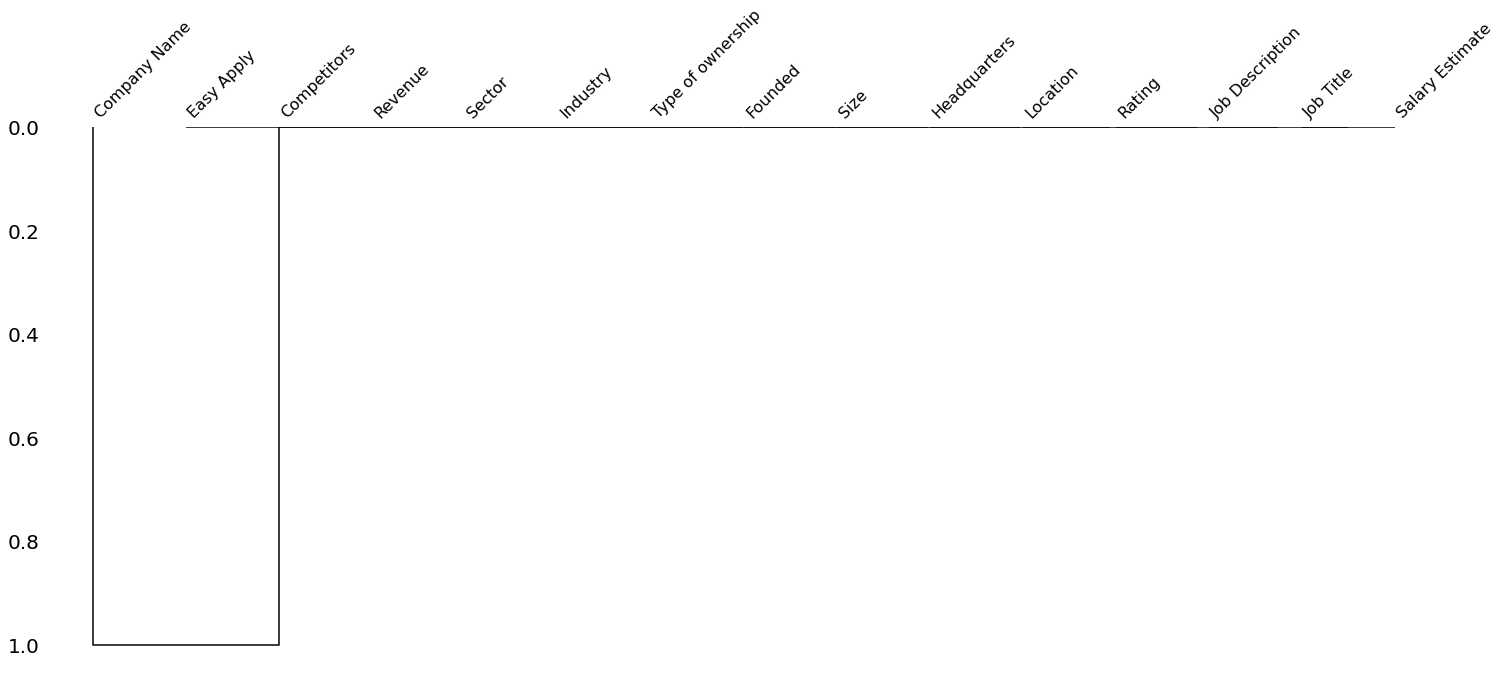

In [6]:
msno.dendrogram(data)

# **Clear Null Value**


Check Salary Estimate & Company name that has null value



In [7]:
data[data['Salary Estimate'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply


In [10]:
data[data['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply



Change Error text to Null



In [8]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

data.dropna(subset=['Salary Estimate'], inplace=True)
data.dropna(subset=['Company Name'], inplace=True)

data['Type of ownership'] = data['Type of ownership'].replace('Unknown',np.nan)
data['Size'] = data['Size'].replace('Unknown',np.nan)

In [9]:
newData=pd.DataFrame(data)

In [30]:
newData.dropna(subset=["Headquarters","Size","Founded","Type of ownership","Industry","Sector","Revenue"], inplace=True)

In [31]:
newData[newData['Headquarters'].isnull() & newData['Size'].isnull() & newData['Founded'].isnull() & newData['Type of ownership'].isnull() & newData['Industry'].isnull() & newData['Sector'].isnull() & newData['Revenue'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary


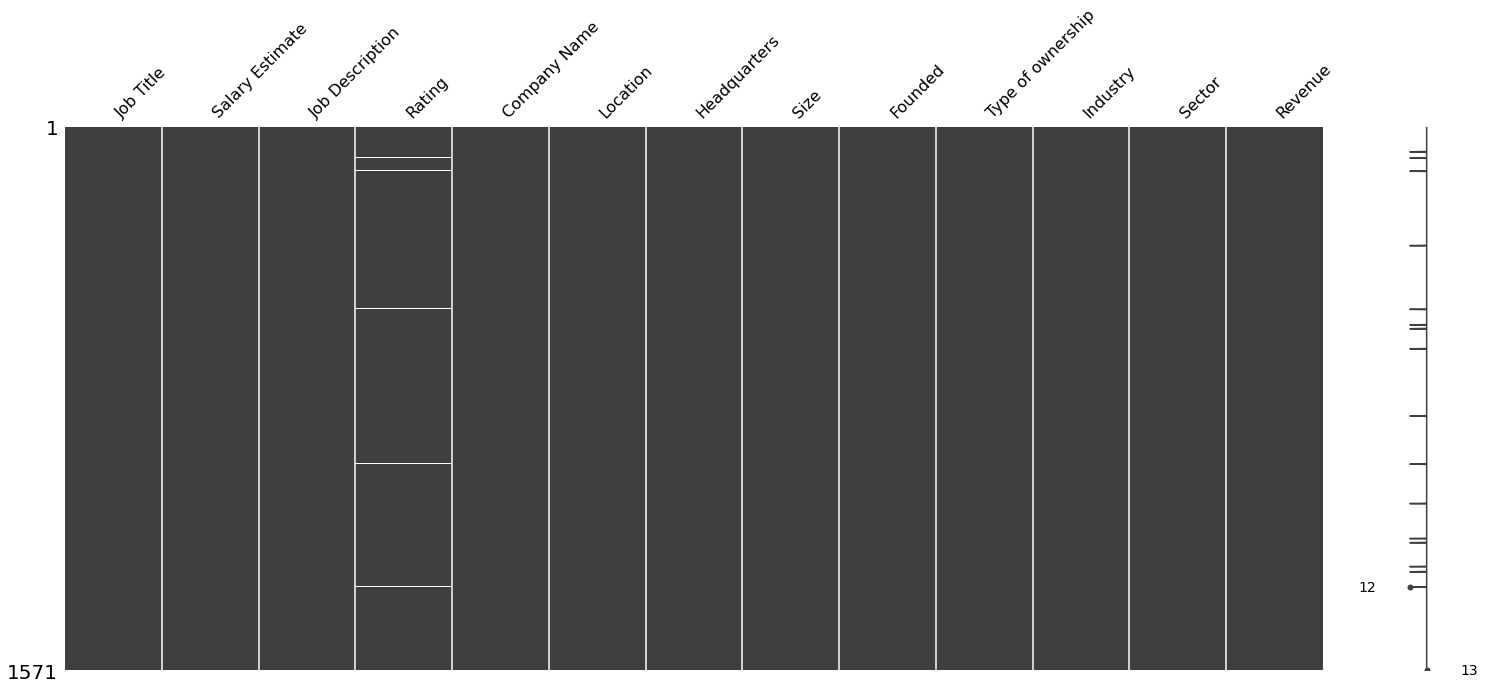

In [ ]:
msno.matrix(newData)

# **Modify Salary Estimate Column to value that can Analysis**

Remove (Glassdoor est.)



In [26]:
newData['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



Add Max - Min Salary Estimate

In [27]:
minSalary, maxSalary=newData['Salary Estimate'].str.split('-').str
minSalary= minSalary.str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
maxSalary= maxSalary.str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [38]:
newData

""


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,Data Analyst-(Remote- All across,$78K-$104K,About CenturyLink\n\nCenturyLink (NYSE: CTL) i...,3.0,CenturyLink\n3.0,"Broomfield, CO","Monroe, LA",10000+ employees,1930.0,Company - Public,"Cable, Internet & Telephone Providers",Telecommunications,$10+ billion (USD),"AT&T, Verizon",NaN
2245,Data Analyst Supporting the DEA #20-242,$78K-$104K,Salary:\nPublished Job Title:\nData Analyst Su...,2.8,Forfeiture Support Associates\n2.8,"Centennial, CO","Ashburn, VA",1001 to 5000 employees,2004.0,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),NaN,NaN
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2251,"Data Analyst 3, Customer Experience",$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


In [ ]:
title = pd.DataFrame(data,columns=['Job Title'])

In [ ]:
title.stack().value_counts()

Data Analyst                                       404
Senior Data Analyst                                 90
Junior Data Analyst                                 30
Business Data Analyst                               28
Sr. Data Analyst                                    21
                                                  ... 
Enterprise Data Office Analyst IV                    1
Business Intelligence and Data Sciences Analyst      1
Data Analyst - Marketing Analytics                   1
Data Analyst - Health                                1
Network Data Analyst                                 1
Length: 1271, dtype: int64

In [ ]:
[itm[0] for itm in title['Job Title'].str.findall('^[Ss][Rr].*') if len(itm)>0]

['Sr. Business Intelligence Engineer / Data Analyst',
 'Sr. Data Profiling Analyst',
 'Sr. Data Analyst, Revenue Analytics, Peacock',
 'Sr Business /Data Analyst- Reference data',
 'Sr. Data Analyst',
 'Sr. Datastage and Data Analyst',
 'Sr. Reference Data Business Analyst - SQL',
 'Sr Business Analyst, Data Science',
 'Sr. Data Analyst, Retail Media',
 'Sr IT Technical Data Analyst',
 'SR. Power BI with DAX - Data Analyst',
 'Sr Business Data Analyst SAP, SKU, Supply Chain',
 'Sr Data Analyst for Customer Based Management',
 'Sr. Specialist Reporting Data Analyst /Engineer - Cloud',
 'Sr Data Analyst, Go-Live',
 'Sr. Data Analyst - RWE',
 'Sr. Specialist Reporting Data Analyst -Technology',
 'Sr. Programmer Analyst - Big Data',
 'Sr. Principal Metrics Analyst- Data Scientist',
 'Sr. Data Analyst',
 'Sr Python Data Analyst(no c2c) contract w2 only',
 'Sr Data Business Analyst - FacilitySource',
 'Sr Data Business Analyst - FacilitySource',
 'Sr. Data Analyst, Consumer Applications',
 '

In [ ]:
title['Job Title'].str.count('^[Ss][Rr].*').sum()

118

In [ ]:
title['Job Title'] = title['Job Title'].str.replace('Sr.','Senior')

In [ ]:
[itm[0] for itm in title['Job Title'].str.findall('^[Ss][Rr].*') if len(itm)>0]

['SR. Power BI with DAX - Data Analyst', 'SR BUSINESS DATA ANALYST PRN']

In [ ]:
title['Job Title'] = title['Job Title'].str.replace('SR.','Senior')

In [ ]:
[itm[0] for itm in title['Job Title'].str.findall('^[Ss][Rr].*') if len(itm)>0]

[]

In [ ]:
title['Job Title'].str.count('^[Ss][Rr].*').sum()

0

In [ ]:
title['Job Title'] = title['Job Title'].str.title()

In [ ]:
title['Job Title'] = title['Job Title'].str.replace('Data Analyst Junior','Junior Data Analyst')

In [ ]:
title2 = re.findall(r'^[Dd]ata Analyst', jobTitle2['Job Title'])

TypeError: ignored

In [ ]:
for i in title['Job Title'].unique():
  print(i)

Data Analyst, Center On Immigration And Justice (Cij)
Quality Data Analyst
Senior Data Analyst, Insights & Analytics Team [Customer Operations]
Data Analyst
Reporting Data Analyst
Business/Data Analyst (Fp&A)
Data Science Analyst
Data Analyst, Merchant Health
Senior Data Analyst
Investment Advisory Data Analyst
Sustainability Data Analyst
Clinical Data Analyst
Data Programmer/Analyst
Product Analyst, Data Science
Data Analyst - Intex Developer
Entry Level / Jr. Data Analyst
Data + Business Intelligence Analyst
Data Analyst, Product
Data Analyst Entry Level
Data Science Analyst, Capital Markets
Data Analyst (Games)
Analyst/Associate Global Markets Credit Data Analyst
Data Business Analyst
Data Analyst With Excel/Dax/ Powerbi Experience- Fulltime
Data Science Analyst/Engineer
Business Analyst, Data Platforms
Behavioral Data Analyst
Data Analyst -1+ Year Contract - Nyc
Advertising Data Analyst
Market Data Reporting Analyst
Senior Analyst, Data Science
Senior Data Analyst, Disney+
Office O